a) Given a set of ambulances, count how many is covered by r.

b) Given a percentage of coverage, determine the minimum radius that achieves this coverage.

In [1]:
import read_data
import numpy as np
from matplotlib import pyplot as plt

(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()
allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)

ind = np.random.randint(0, allbases.shape[0], 8)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)

distance = times[ind,:]

In [2]:
def radius_to_coverage (r1=600, graph=True):
    r1_coverage = np.any(distance < r1, 0)
    r1_covered = np.nonzero(r1_coverage)
    r1_exposed = np.nonzero(np.logical_not(r1_coverage))

    c = np.shape(r1_covered)[1]
    e = np.shape(r1_exposed)[1]
    ratio = (c / (c + e))
    

    if graph:
        plt.figure()
        plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
        plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
        plt.scatter(bases[:,0],bases[:,1], c='y')
        plt.show()
    
    return 100. * ratio

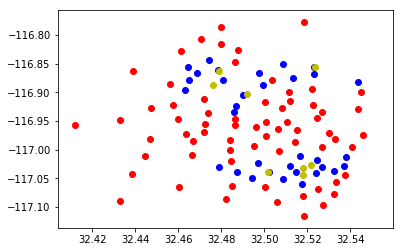

33.0

In [3]:
radius_to_coverage(r1=500)

In [4]:
def coverage_to_radius(target_coverage):
    r = 1700
    actual_coverage = 99999999
    
    # Binary search downwards from r=2000 towards optimal r.
    print("Going down.")
    while (actual_coverage - target_coverage > 5):
        actual_coverage = radius_to_coverage(r, graph=False)
        r /= 2
    print ("target coverage: ", target_coverage)
    print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
    
    
    # Binary search towards target_coverage
    print("Going back up.")
    while (target_coverage - actual_coverage > 5):
        actual_coverage = radius_to_coverage(r, graph=False)
        r += 100
    print ("target coverage: ", target_coverage)
    print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
    
    print ("Going back down.")
    while (actual_coverage - target_coverage > 0.5):
        actual_coverage = radius_to_coverage(r, graph=False)
        r -= 1
    print ("target coverage: ", target_coverage)
    print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
    
    return r

In [5]:
coverage_to_radius(80)

Going down.
target coverage:  80
actual coverage:  73.0 
r:  425.0 

Going back up.
target coverage:  80
actual coverage:  83.0 
r:  1025.0 

Going back down.
target coverage:  80
actual coverage:  79.0 
r:  914.0 



914.0

In [6]:
coverage_to_radius(55)

Going down.
target coverage:  55
actual coverage:  22.0 
r:  212.5 

Going back up.
target coverage:  55
actual coverage:  59.0 
r:  812.5 

Going back down.
target coverage:  55
actual coverage:  55.00000000000001 
r:  687.5 



687.5

In [7]:
all_radiuses = []
for coverage in range (101):
    r = coverage_to_radius(coverage)
    all_radiuses.append([coverage, r])

Going down.
target coverage:  0
actual coverage:  5.0 
r:  106.25 

Going back up.
target coverage:  0
actual coverage:  5.0 
r:  106.25 

Going back down.
target coverage:  0
actual coverage:  0.0 
r:  6.25 

Going down.
target coverage:  1
actual coverage:  5.0 
r:  106.25 

Going back up.
target coverage:  1
actual coverage:  5.0 
r:  106.25 

Going back down.
target coverage:  1
actual coverage:  1.0 
r:  53.25 

Going down.
target coverage:  2
actual coverage:  5.0 
r:  106.25 

Going back up.
target coverage:  2
actual coverage:  5.0 
r:  106.25 

Going back down.
target coverage:  2
actual coverage:  2.0 
r:  60.25 

Going down.
target coverage:  3
actual coverage:  5.0 
r:  106.25 

Going back up.
target coverage:  3
actual coverage:  5.0 
r:  106.25 

Going back down.
target coverage:  3
actual coverage:  3.0 
r:  105.25 

Going down.
target coverage:  4
actual coverage:  5.0 
r:  106.25 

Going back up.
target coverage:  4
actual coverage:  5.0 
r:  106.25 

Going back down.


In [8]:
print (all_radiuses)

[[0, 6.25], [1, 53.25], [2, 60.25], [3, 105.25], [4, 105.25], [5, 106.25], [6, 106.25], [7, 106.25], [8, 106.25], [9, 106.25], [10, 106.25], [11, 260.25], [12, 272.25], [13, 288.25], [14, 289.25], [15, 406.25], [16, 406.25], [17, 211.5], [18, 211.5], [19, 211.5], [20, 211.5], [21, 211.5], [22, 212.5], [23, 212.5], [24, 212.5], [25, 212.5], [26, 212.5], [27, 212.5], [28, 470.5], [29, 470.5], [30, 475.5], [31, 487.5], [32, 487.5], [33, 502.5], [34, 507.5], [35, 612.5], [36, 612.5], [37, 612.5], [38, 612.5], [39, 612.5], [40, 612.5], [41, 580.5], [42, 586.5], [43, 590.5], [44, 712.5], [45, 712.5], [46, 712.5], [47, 712.5], [48, 712.5], [49, 712.5], [50, 658.5], [51, 661.5], [52, 685.5], [53, 686.5], [54, 686.5], [55, 687.5], [56, 697.5], [57, 698.5], [58, 708.5], [59, 812.5], [60, 812.5], [61, 812.5], [62, 812.5], [63, 812.5], [64, 812.5], [65, 760.5], [66, 765.5], [67, 767.5], [68, 424.0], [69, 424.0], [70, 424.0], [71, 424.0], [72, 424.0], [73, 425.0], [74, 425.0], [75, 425.0], [76, 425

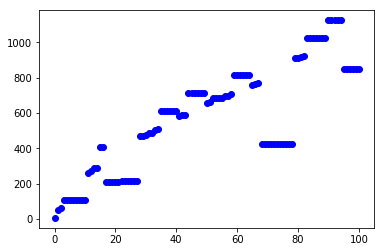

In [9]:
radius_array = np.array(all_radiuses)


plt.figure()
plt.scatter(radius_array[:,0],radius_array[:,1], c='b')
plt.show()